<a href="https://colab.research.google.com/github/CassioAI/Cirip/blob/master/ConvNetwrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the used packages
## Numpy for arrays
import numpy as np
## Pyplot from Matplotlib for vizualising the test results in plots
import matplotlib.pyplot as plt
%matplotlib inline
## Math for Sqrt
import math
## Drive from Google.Colab because I was storing my database in google drive
from google.colab import drive
## Genfromtxt to convert our csv file to array
from numpy import genfromtxt
## Keras.* for building my fully connected dense neural network 
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Flatten
from keras.callbacks import Callback
from keras.optimizers import SGD
## Mean_squared_error from sklearn.metrics for calculating mean squared error
from sklearn.metrics import mean_squared_error
## keras.callbacks.* for Earlystopping (modelcheckpoint is needed to load back the weights)
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [0]:
#The pictures are in the kepek.zip pls donwload them and set the path to the downloaded path
source="/content/gdrive/My Drive/DeepLearning/images
typ   =".jpg"
imageArray=[{1,2},{2,3}]
imageArray.clear()
try:
  for i in range():
    imageArray.append(Image.open(source+str(i+1)+typ))
except IOError:
  print("Error, was unable to load images to imageArray")
  pass
source="/content/gdrive/My Drive/DeepLearning/images/v"
typ   =".jpg"
imageArrayVal=[{1,2},{2,3}]
imageArrayVal.clear()
try:
  for i in range(10):
    imageArrayVal.append(Image.open(source+str(i+1)+typ))
except IOError:
  print("Error, was unable to load images to imageArray")
  pass
source="/content/gdrive/My Drive/DeepLearning/images/t"
typ   =".jpg"
imageArrayt=[{1,2},{2,3}]
imageArrayt.clear()
try:
  for i in range(2):
    imageArrayt.append(Image.open(source+str(i+1)+typ))
except IOError:
  print("Error, was unable to loadz images to imageArray"+str(i))
  pass

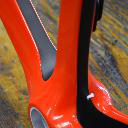

In [5]:
imageArrayt[1]

In [0]:
imageArray[24]
labImage = skcolor.rgb2lab(np.array(imageArray[24])/255)


In [27]:
skcolor.rgb2lab(np.array(imageArray[0]))

array([[[ 5.83107095e+01,  6.30212766e-01, -2.78270078e+00],
        [ 5.40090589e+01,  4.35592479e-01, -2.28578185e+00],
        [ 5.84449680e+01, -9.31535405e-01,  2.77675278e-01],
        ...,
        [ 9.95337090e+01, -4.83464927e-01, -7.02874568e-01],
        [ 8.00538539e+01,  1.59005973e+00, -6.20985889e+00],
        [ 8.32942571e+01,  1.57358469e+00, -6.15921574e+00]],

       [[ 6.19282030e+01,  1.58203288e+00, -4.19500276e+00],
        [ 5.75095721e+01,  4.29260005e-01, -2.25812102e+00],
        [ 5.76731820e+01, -9.33935792e-01,  2.78383832e-01],
        ...,
        [ 8.91894410e+01,  6.50500703e-01, -4.73142271e+00],
        [ 9.72171407e+01,  4.50595790e-01, -4.16849468e+00],
        [ 9.55049809e+01,  6.37407799e-01, -4.66350607e+00]],

       [[ 7.13154304e+01,  1.53260312e+00, -4.07820197e+00],
        [ 6.40398157e+01,  6.16573606e-01, -2.73167195e+00],
        [ 5.43420689e+01,  2.78481040e-02, -1.20622483e+00],
        ...,
        [ 9.86759123e+01, -1.10736847e+00,

In [0]:
npImageArray=np.empty((len(imageArray),128,128,3))
for i in range(len(imageArray)):
  npImageArray[i]=np.array(imageArray[i])/255
  npImageArray[i] = skcolor.rgb2lab(npImageArray[i])
  
npImageArrayVal=np.empty((len(imageArrayVal),128,128,3))
for i in range(len(imageArrayVal)):
  npImageArrayVal[i]=np.array(imageArrayVal[i])/255
  npImageArrayVal[i] = skcolor.rgb2lab(npImageArrayVal[i])
                                                       
inputArray  = np.empty((50,128,128,1))
inputArray[:,:,:,0]  = npImageArray[:,:,:,0]
outputArray = (npImageArray[:,:,:,1::])/255-128
inputArray  = (inputArray-np.average(inputArray))/np.std(inputArray)
                                                       
inputArrayVal  = np.empty((10,128,128,1))
inputArrayVal[:,:,:,0]  = npImageArrayVal[:,:,:,0]
outputArrayVal = (npImageArrayVal[:,:,:,1::])/255-128
inputArrayVal  = (inputArrayVal-np.average(inputArray))/np.std(inputArray)
                     
npImageArrayT=np.empty((len(imageArrayt),128,128,3))
for i in range(len(imageArrayt)):
  npImageArrayT[i]=np.array(imageArrayt[i])/255
  npImageArrayT[i] = skcolor.rgb2lab(npImageArrayT[i])
                                                       
inputArrayT  = np.empty((2,128,128,1))
inputArrayT[:,:,:,0]  = npImageArrayT[:,:,:,0]
outputArrayT = (npImageArrayT[:,:,:,1::])/255-128
inputArrayT  = (inputArrayT-np.average(inputArray))/np.std(inputArray)

In [0]:
#Class TrainingHistory
class TrainingHistory(Callback):
  def on_train_begin(self, logs={}):
    self.losses=[]
    self.valid_losses =[]
    self.accs = []
    self.valid_accs = []
    self.epoch=0
    
  def on_epoch_end(self, epoch,logs={}):
    self.losses.append(logs.get('loss'))
    self.valid_losses.append(logs.get('val_loss'))
    self.accs.append(logs.get('acc'))
    self.valid_accs.append(logs.get('val_acc'))
    self.epoch += 1
#Initializing the history  
history = TrainingHistory()

#Defining the earlystopping
es = EarlyStopping(patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

In [0]:
model = Sequential();
model.add(Conv2D(data_format="channels_first",input_shape=(128, 128,1), filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(data_format="channels_first",filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(data_format="channels_first",filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(data_format="channels_first",filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(data_format="channels_first",filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(data_format="channels_first",filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(data_format="channels_first",filters=128, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(data_format="channels_first",filters=128, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(data_format="channels_first",filters=128, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(data_format="channels_first",filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(data_format="channels_first",filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(data_format="channels_first",filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='linear', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(1024, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1024, activation='linear'))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(2*128*128, activation='linear'))
model.add(Activation('sigmoid'))  

In [10]:
sgd=SGD(lr=1, momentum=0.09, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

hst = model.fit(inputArray, outputArray.reshape((-1,2*128*128)),\
         batch_size=1,
         epochs=1,
         verbose=2,
         validation_data=(inputArrayVal,outputArrayVal.reshape((-1,2*128*128))),
         callbacks=[mcp, es, history],
         shuffle=True)

Train on 50 samples, validate on 10 samples
Epoch 1/1000
 - 6s - loss: -5.5800e+07 - val_loss: -5.6306e+07

Epoch 00001: val_loss improved from inf to -56305522.80000, saving model to weights.hdf5
Epoch 2/1000
 - 2s - loss: -5.6308e+07 - val_loss: -5.6306e+07

Epoch 00002: val_loss did not improve from -56305522.80000
Epoch 3/1000
 - 2s - loss: -5.6308e+07 - val_loss: -5.6306e+07

Epoch 00003: val_loss did not improve from -56305522.80000
Epoch 4/1000
 - 2s - loss: -5.6308e+07 - val_loss: -5.6306e+07

Epoch 00004: val_loss did not improve from -56305522.80000
Epoch 5/1000
 - 2s - loss: -5.6308e+07 - val_loss: -5.6306e+07

Epoch 00005: val_loss did not improve from -56305522.80000
Epoch 6/1000
 - 2s - loss: -5.6308e+07 - val_loss: -5.6306e+07

Epoch 00006: val_loss did not improve from -56305522.80000
Epoch 7/1000
 - 2s - loss: -5.6308e+07 - val_loss: -5.6306e+07

Epoch 00007: val_loss did not improve from -56305522.80000
Epoch 8/1000
 - 2s - loss: -5.6308e+07 - val_loss: -5.6306e+07

E

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 9112 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


<function matplotlib.pyplot.show>

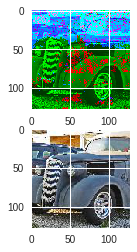

In [14]:
preds=model.predict(inputArrayT).reshape((2,128,128,2))*255
visual=np.empty((2,128,128,3))
visual[:,:,:,0]=npImageArrayT[:,:,:,0]
visual[:,:,:,1::]=preds-127
plt.subplot(2,1,1)
plt.imshow(skcolor.lab2rgb(visual[0]))
plt.subplot(2,1,2)
plt.imshow(imageArrayt[0])
plt.show

In [22]:
ar[0,0]

array([139, 140, 145], dtype=uint8)

NameError: ignored

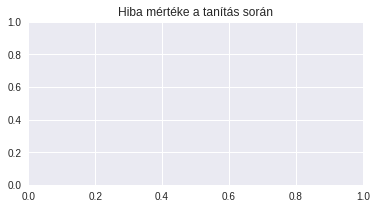

In [4]:
plt.figure(figsize=(6,3))
plt.title("Hiba mértéke a tanítás során")
plt.plot(np.arange(history.epoch), history.losses, color='g',  
         label="Hiba a tanító adatokon")
plt.plot(np.arange(history.epoch), history.valid_losses, color='r',
         label="Hiba a validációs adatokon")
plt.legend(loc='upper right')
plt.xlabel("Epochok száma")
plt.ylabel("Hiba")
plt.grid(True)
plt.show()